In [1]:
from polytrope_model import *
from scipy.stats import norm


In [2]:
def monte_carlo(M, dM, R, dR, L, dL, Z_X, dZ_X, Y, dY, r_n, d_c, tau, tau_t, N, L_sol,a,b):
    nn = np.zeros(N)
    Mm = M + dM*np.random.normal(0, 1, N)
    Rr = R + dR*np.random.normal(0, 1, N)
    Ll = L + dL*np.random.normal(0, 1, N)
    Z_Xx = Z_X + dZ_X*np.random.normal(0, 1, N)
    Yy = Y + dY*np.random.normal(0, 1, N)
    for i in range(N):
        print(f"Iteration {i + 1}/{N}")
        try:
            # Attempt to calculate the polytropic index with the current parameters
            nn[i] = index(y, a, b, Mm[i], Ll[i], Yy[i], Z_Xx[i], Rr[i], r_n, d_c, tau, tau_t, L_sol)
        except ValueError as e:
            # If there's a ValueError, skip this iteration and print a message
            print(f"Warning: Skipping iteration {i + 1} due to error: {e}")
            #nn[i] = np.nan  # Optionally, set this entry to NaN or some other marker
    return nn

In [3]:
#Sol
M_sol = 1.988475e33
L_sol = 3.828e33
R_sol = 6.957e10
Z_sol = 0.02857
Y_sol = 0.28

#%%
# Epsilon Eridani
M_e = 0.82 * M_sol
dM_e = 0.02 * M_sol
R_e = 0.738 * R_sol
dR_e= 0.0003 * R_sol
L_e = 0.32 * L_sol
dL_e = 0.01 * L_sol
metal_e = -0.08
dmetal_e = 0.01
Z_e = Z_sol*10**metal_e
Y_e = 0.2423
dY_e = 0.0054
total_time_e = 2*4.6*M_e*(1/L_e)


#Alpha Leonis
M_a = 3.44 * M_sol
dM_a = 0.045 * M_sol # -0.01, +0.08
R_a =  3.65 * R_sol # 4.16 (equatorial) + 3.14 (polar) / 2
dR_a = 0.05* M_sol # sqrt((0.08/2)^2 + (0.06/2)^2)
L_a = 314 * L_sol
dL_a = 36 * L_sol
metal_a = 0.21
dmetal_a = 0.05 # assumed value
Z_a = Z_sol*10**metal_a
Y_a = 0.2423
dY_a = 0.0054
total_time_a = 2*4.6*M_a*(1/L_a)

# Theta Persei
M_t = 1.138 * M_sol
dM_t = 0.010 * M_sol
R_t = 1.319 * R_sol
dR_t = 0.011 * R_sol
L_t = 2.235 * L_sol
dL_t = 0.040 * L_sol
metal_t = -0.03
dmetal_t = 0.09
Z_t = Z_e = Z_sol*10**metal_t
Y_t = 0.2423
dY_t = 0.0054
total_time_t = 2*4.6*M_e*(1/L_t)

/Users/rodrigocastro/Desktop/Computational_Astronomy/polytrope_model.py:36: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(lane_emden_sys, lane_em_0, xi_range, args=(n,), tfirst=True)


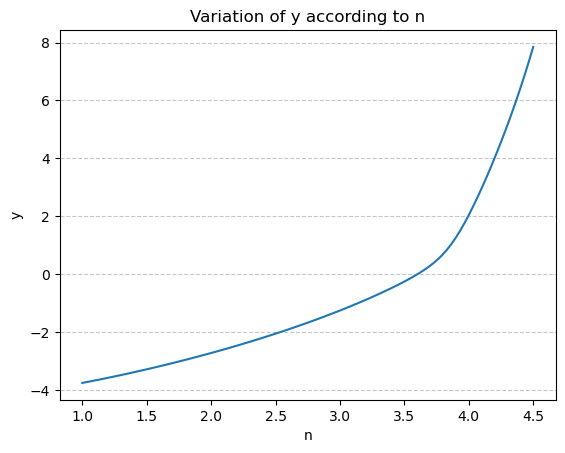

In [4]:
valores_t = np.linspace(1, 4.5, 100)
Xs = (1-Y_t)/(1+Z_t)
Z = 1-Y_t-Xs
yy_t = [y(i, Xs, 0.2, 0.03, R_t, total_time_t/2, total_time_t, M_t, Z, L_sol, L_t) for i in valores_t]
plt.plot(valores_t, yy_t)
plt.xlabel('n')
plt.ylabel('y')
plt.title('Variation of y according to n')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
poly_index_t = index(y, 2.5, 4.5, M_t, L_t, Y_t, Z_t, R_t, L_sol, 0.2, 0.03, total_time_t/3, total_time_t)
poly_index_t

3.606496714632158

In [6]:
Xs = (1-Y_sol)/(1+Z_sol)
Z = 1-Y_sol-Xs
xi, y1, y2 = lane_emden_solver(poly_index_t)
X = chemical_composition(xi, Xs, 0.2, 0.03, total_time_t/3, total_time_t)
nn_t = monte_carlo(M_t, dM_t, R_t, dR_t, L_t, dL_t,  Z_t, dmetal_t, Y_t, dY_t, 0.2, 0.03, total_time_t/2, total_time_t, 3000, L_sol, a=1, b=3.9)

Iteration 1/3000
Iteration 2/3000
Iteration 3/3000
Iteration 4/3000
Iteration 5/3000
Iteration 6/3000
Iteration 7/3000
Iteration 8/3000
Iteration 9/3000
Iteration 10/3000
Iteration 11/3000
Iteration 12/3000
Iteration 13/3000
Iteration 14/3000
Iteration 15/3000
Iteration 16/3000
Iteration 17/3000
Iteration 18/3000
Iteration 19/3000
Iteration 20/3000
Iteration 21/3000
Iteration 22/3000
Iteration 23/3000
Iteration 24/3000
Iteration 25/3000
Iteration 26/3000
Iteration 27/3000
Iteration 28/3000
Iteration 29/3000
Iteration 30/3000
Iteration 31/3000
Iteration 32/3000
Iteration 33/3000
Iteration 34/3000
Iteration 35/3000
Iteration 36/3000
Iteration 37/3000
Iteration 38/3000
Iteration 39/3000
Iteration 40/3000
Iteration 41/3000
Iteration 42/3000
Iteration 43/3000
Iteration 44/3000
Iteration 45/3000
Iteration 46/3000
Iteration 47/3000
Iteration 48/3000
Iteration 49/3000
Iteration 50/3000
Iteration 51/3000
Iteration 52/3000
Iteration 53/3000
Iteration 54/3000
Iteration 55/3000
Iteration 56/3000
I

In [7]:
def plot_histogram(nn, bins):
    plt.hist(nn, bins=bins, color='blue', edgecolor='black')
    plt.xlabel('n')
    plt.ylabel('N(n)')
    plt.title('Monte Carlo Simulation Results for Index')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

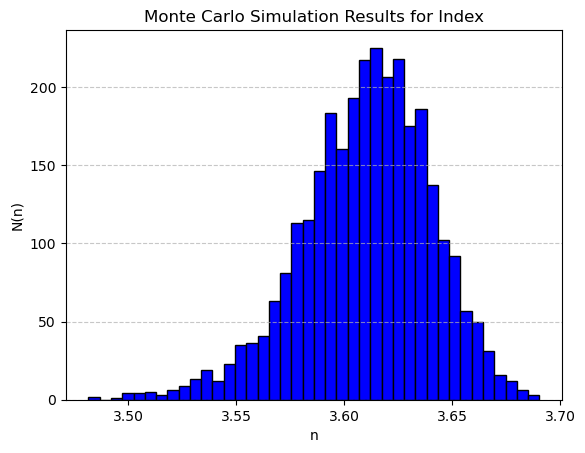

In [8]:
plot_histogram(nn_t,40)

In [9]:
std_t = np.std(nn_t)
mean_t = np.mean(nn_t)

In [24]:
# Generate x values for the curve
x = np.linspace(mean_t - 6*std_t, mean_t + 6*std_t, 3000)

# Calculate the PDF of the normal distribution
y = norm.pdf(x, mean_t, std_t)

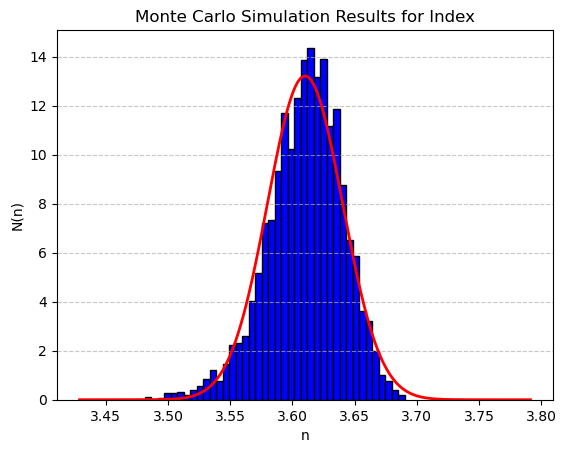

In [25]:
plt.hist(nn_t, 40, color='blue', edgecolor='black', density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.xlabel('n')
plt.ylabel('N(n)')
plt.title('Monte Carlo Simulation Results for Index')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()